## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Biology/Raisin_Dataset.csv')
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Create GReaT Model

In [6]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=100,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_raisin", # Name of the directory where all intermediate steps are saved
              batch_size=32                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [7]:
trainer = great.fit(data)

2024-06-26 23:14:07,023 - INFO - Convert data into HuggingFace dataset object... (great.py:172)
2024-06-26 23:14:07,038 - INFO - Create GReaT Trainer... (great.py:177)
2024-06-26 23:14:08,573 - INFO - Start training... (great.py:193)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,2.129500
200,1.839200
300,1.791300
400,1.753200
500,1.721200
600,1.681700
700,1.648100
800,1.595100
900,1.545100
1000,1.488000


In [8]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 1997.241,
 'train_samples_per_second': 45.062,
 'train_steps_per_second': 1.452,
 'total_flos': 3360374756352000.0,
 'train_loss': 1.3380799550023572,
 'epoch': 100.0,
 'step': 2900}

In [9]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

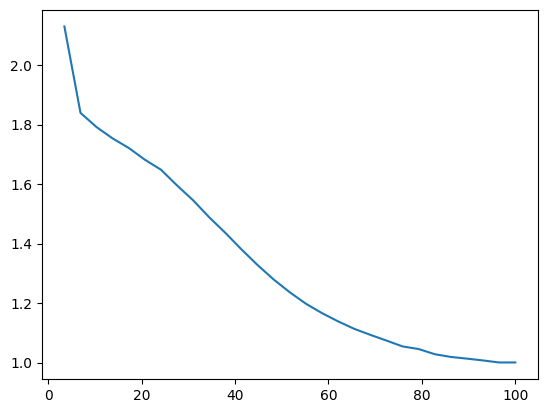

In [10]:
plt.plot(epochs, loss)

### Generate Samples

In [11]:
n_samples = 900

In [12]:
samples = great.sample(n_samples, k=50, max_length=200)

  0%|          | 0/900 [00:00<?, ?it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class i

  5%|▌         | 49/900 [00:03<00:52, 16.22it/s]

['Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,']


 11%|█         | 98/900 [00:05<00:47, 16.82it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecime

 16%|█▌        | 144/900 [00:08<00:45, 16.47it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,']


 22%|██▏       | 194/900 [00:11<00:41, 16.99it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Ke

 27%|██▋       | 242/900 [00:14<00:39, 16.83it/s]

['Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besn

 32%|███▏      | 291/900 [00:17<00:35, 16.97it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,']


 38%|███▊      | 339/900 [00:20<00:32, 17.15it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Ke

 43%|████▎     | 386/900 [00:22<00:30, 16.84it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class i

 48%|████▊     | 431/900 [00:25<00:28, 16.58it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,']


 53%|█████▎    | 478/900 [00:28<00:24, 17.07it/s]

['Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,']


 59%|█████▊    | 527/900 [00:31<00:22, 16.39it/s]

['Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,

 64%|██████▎   | 573/900 [00:34<00:20, 15.66it/s]

['Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,']


 69%|██████▉   | 623/900 [00:37<00:16, 16.53it/s]

['Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,']


 74%|███████▍  | 668/900 [00:40<00:14, 16.30it/s]

['Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,']


 80%|███████▉  | 716/900 [00:43<00:11, 16.53it/s]

['Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,']

 85%|████████▍ | 761/900 [00:46<00:08, 16.05it/s]

['Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class

 90%|████████▉ | 808/900 [00:48<00:05, 16.27it/s]

['Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,']


 95%|█████████▍| 854/900 [00:51<00:02, 16.34it/s]

['Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Besni,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,', 'Class is Besni,', 'Class is Kecimen,']


901it [00:54, 16.54it/s]                         


In [13]:
samples.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,57999.0,328.282460,199.814734,0.796399,61277.0,0.692869,814.109,Kecimen
1,61711.0,352.011403,238.895398,0.718939,63641.0,0.728768,921.811,Kecimen
2,70941.0,364.190843,249.529450,0.681162,72819.0,0.759914,1085.837,Kecimen
3,61762.0,333.676202,226.507474,0.829402,62380.0,0.728765,983.613,Kecimen
4,103772.0,562.713770,250.944920,0.761198,106439.0,0.697671,1298.308,Besni


In [14]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Biology/Raisin_samples.csv",index=False)

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


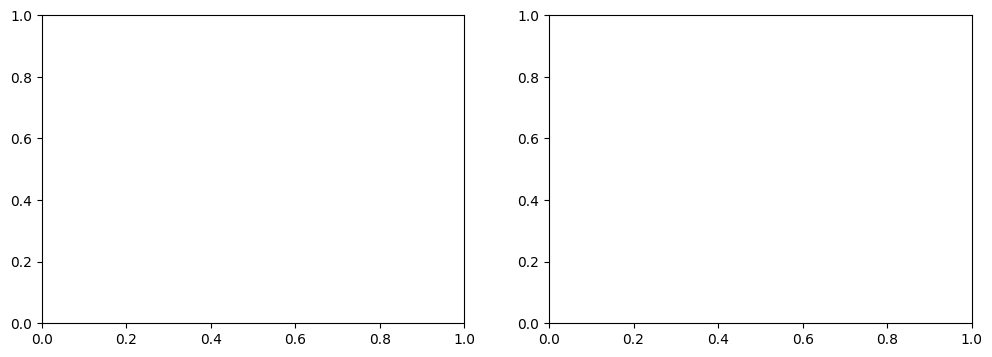

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

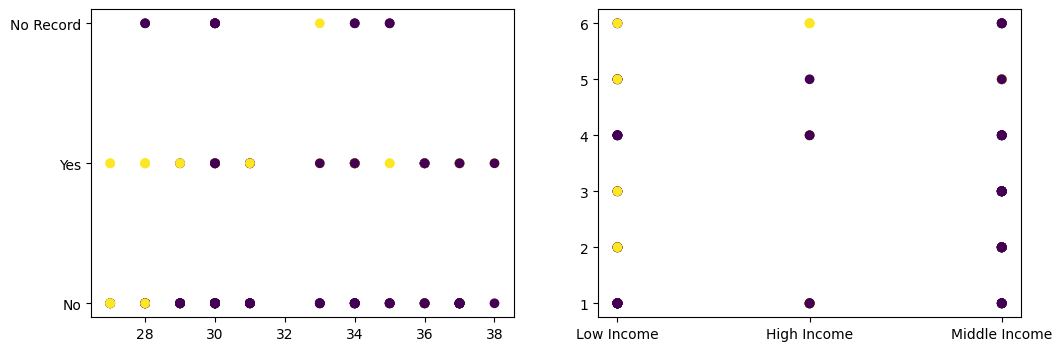

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

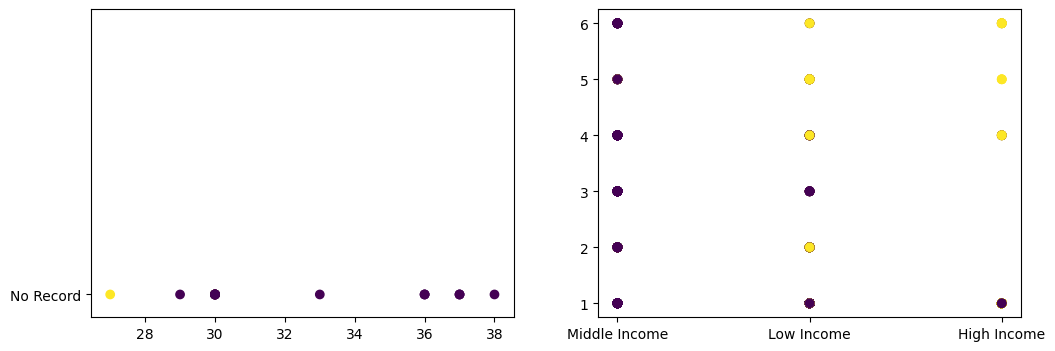

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
